<a href="https://colab.research.google.com/github/son50git/Routine-with-Python/blob/master/StackedBar_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def stackedBarCategories (rpt_name):

  from google.colab import drive, files
  drive.mount("/content/drive")
  uploaded = files.upload()

  sheets = ["Hist Days of Week(non-Adj)", "RD Cats"]

  for sheet in sheets:

    cats_df = pd.read_excel(rpt_name, sheet_name=sheet)  
    cats_df = cats_df[['ART','SLP','ORD','LES','TRA','Rel','Ref','PHA','SPC']]

    if sheet == "RD Cats":
      cats_df["ART"] = cats_df.ART.rolling(7, min_periods=7).mean()
      cats_df["SLP"] = cats_df.SLP.rolling(7, min_periods=7).mean()
      cats_df["ORD"] = cats_df.ORD.rolling(7, min_periods=7).mean()
      cats_df["LES"] = cats_df.LES.rolling(7, min_periods=7).mean()
      cats_df["TRA"] = cats_df.TRA.rolling(7, min_periods=7).mean()
      cats_df["Rel"] = cats_df.Rel.rolling(7, min_periods=7).mean()
      cats_df["Ref"] = cats_df.Ref.rolling(7, min_periods=7).mean()
      cats_df["PHA"] = cats_df.PHA.rolling(7, min_periods=7).mean()
      cats_df["SPC"] = cats_df.SPC.rolling(7, min_periods=7).mean()
      cats_df = cats_df.tail(21)
    # print(cats_df)

    tmp_2 = [i + j for i,j in zip(cats_df["ART"],cats_df["SLP"])]
    tmp_3 = [i + j for i,j in zip(tmp_2,cats_df["ORD"])]
    tmp_4 = [i + j for i,j in zip(tmp_3,cats_df["LES"])]
    tmp_5 = [i + j for i,j in zip(tmp_4,cats_df["TRA"])]
    tmp_6 = [i + j for i,j in zip(tmp_5,cats_df["Rel"])]
    tmp_7 = [i + j for i,j in zip(tmp_6,cats_df["Ref"])]
    tmp_8 = [i + j for i,j in zip(tmp_7,cats_df["PHA"])]

    f, ax = plt.subplots(1, figsize=(12,5))
    bar_l = [i+1 for i in range(len(cats_df['ART']))]
    ax.bar(bar_l, cats_df["ART"], label="ART", color="olive")
    ax.bar(bar_l, cats_df["SLP"], label="SLP", color="blue", bottom=cats_df["ART"])
    ax.bar(bar_l, cats_df["ORD"], label="ORD", color="brown", bottom=tmp_2)
    ax.bar(bar_l, cats_df["LES"], label="LES", color="red", bottom=tmp_3)
    ax.bar(bar_l, cats_df["TRA"], label="TRA", color="gray", bottom=tmp_4)
    ax.bar(bar_l, cats_df["Rel"], label="Rel", color="cyan", bottom=tmp_5)
    ax.bar(bar_l, cats_df["Ref"], label="Ref", color="purple", bottom=tmp_6)
    ax.bar(bar_l, cats_df["PHA"], label="PHA", color="pink", bottom=tmp_7)
    ax.bar(bar_l, cats_df["SPC"], label="SPC", color="black", bottom=tmp_8)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.75))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving Routine_rpts_20201122_1415.xlsx to Routine_rpts_20201122_1415 (9).xlsx


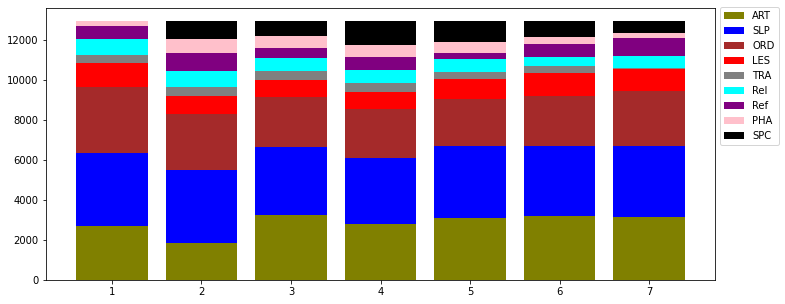

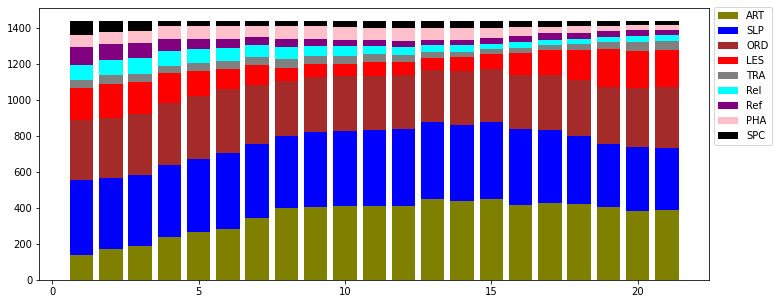

In [27]:
rpt_name ="Routine_rpts_20201122_1415.xlsx"
stackedBarCategories(rpt_name)